<h1>Sorting</h1>

##### There are lots of different sorting algorithms, here we'll review whose are mentioned in<br><br> <b>CLRS</b> or are more popular - [Bubble Sort](#Bubble_Sort), [Selection Sort](#Selection_Sort), [Insertion Sort](#Insertion_Sort), [Merge Sort](#Merge_Sort)<br><br>, [Heap Sort](#Heap_Sort), [Radix Sort](#Radix_Sort), [Bucket Sort](#Bucket_Sort), [Multithreaded Merge Sort](#Multithreaded_Merge_Sort), [Quick Sort](#Quick_Sort).

#### Python sorting algorithms: [Time Sort](#Time_Sort), [Quad Sort](#Quad_Sort).

### <a id='BUbble_Sort'>Bubble Sort</a>

In Bubble sort the elements are swapped if they are in the wrong order.

In [3]:
def swap(arr, i, j):
        arr[i], arr[j] = arr[j], arr[i]

In [4]:
def bubble_sort(arr):
    n = len(arr)
    # It has to run at least once
    swapped = True
    while swapped:
        swapped = False
        for i in range(0, n-1):
            if arr[i] > arr[i+1]:
                swap(arr, i, i+1)
                swapped = True
                    
    return arr

In [5]:
nums = [5, 2, 1, 8, 4]
bubble_sort(nums)

[1, 2, 4, 5, 8]

<b>Time Complexity :</b>
<br>
&emsp; Best case: &emsp; O(n)
<br>
&emsp; Worst case: &emsp; O(n^2)
<br>
&emsp; Average case: &emsp; O(n^2)

<b>Space Complexity :</b>
<br>
&emsp; &emsp; O(1)

<b>Stability :</b>
<br>
&emsp; &emsp; Yes

### <a id='Selection_Sort'>Selection Sort</a>

we divide our input list / array into two parts: the sublist of items already sorted and the sublist of items remaining to be sorted that make up the rest of the list. We first find the smallest element in the unsorted sublist and place it at the end of the sorted sublist.

In [4]:
def selection_sort(arr):        
    for i in range(len(arr)):
        minimum = i
        
        for j in range(i + 1, len(arr)):
            # Select the smallest value
            if arr[j] < arr[minimum]:
                minimum = j

        # Place it at the front of the 
        # sorted end of the array
        arr[minimum], arr[i] = arr[i], arr[minimum]
            
    return arr

In [5]:
nums = [12, 8, 3, 20, 11]
selection_sort(nums)
print(nums)

[3, 8, 11, 12, 20]


<b>Time Complexity :</b>
<br>
&emsp; Best case: &emsp; O(n^2)
<br>
&emsp; Worst case: &emsp; O(n^2)
<br>
&emsp; Average case: &emsp; O(n^2)

<b>Space Complexity :</b>
<br>
&emsp; &emsp; O(1)

<b>Stability :</b>
<br>
&emsp; &emsp; No

### <a id='Insertion_Sort'>Insertion Sort</a>

Insertion sort is a sorting algorithm that places an unsorted element at its suitable place in each iteration.

In [74]:
def insertion_sort(arr):
    for i in range(len(arr)):
        item = arr[i]
        index = i
        while index > 0 and arr[index - 1] > item:
            # Swap the number down the list
            arr[index] = arr[index - 1]
            index = index - 1
        # Break and do the final swap
        arr[index] = item

    return arr

In [75]:
nums = [9, 1, 15, 28, 6]
insertion_sort(nums)
print(nums)

[1, 6, 9, 15, 28]


<b>Time Complexity :</b>
<br>
&emsp; Best case: &emsp; O(n)
<br>
&emsp; Worst case: &emsp; O(n^2)
<br>
&emsp; Average case: &emsp; O(n^2)

<b>Space Complexity :</b>
<br>
&emsp; &emsp; O(1)

<b>Stability :</b>
<br>
&emsp; &emsp; Yes

### <a id='Merge_Sort'>Merg Sort</a>

Merge sort is a perfectly elegant example of a Divide and Conquer algorithm. It simple uses the 2 main steps of such an algorithm:<br>
(1) Continuously divide the unsorted list until you have N sublists, where each sublist has 1 element that is “unsorted” and N is the number of elements in the original array.<br>
(2) Repeatedly merge i.e conquer the sublists together 2 at a time to produce new sorted sublists until all elements have been fully merged into a single sorted array.


In [11]:
def merge(left, right, merged):

    left_cursor, right_cursor = 0, 0
    while left_cursor < len(left) and right_cursor < len(right):
      
        # Sort each one and place into the result
        if left[left_cursor] <= right[right_cursor]:
            merged[left_cursor+right_cursor]=left[left_cursor]
            left_cursor += 1
        else:
            merged[left_cursor + right_cursor] = right[right_cursor]
            right_cursor += 1
            
    for left_cursor in range(left_cursor, len(left)):
        merged[left_cursor + right_cursor] = left[left_cursor]
        
    for right_cursor in range(right_cursor, len(right)):
        merged[left_cursor + right_cursor] = right[right_cursor]

    return merged

In [12]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left, right = merge_sort(arr[:mid]), merge_sort(arr[mid:])

    # Merge each side together
    return merge(left, right, arr.copy())

In [13]:
arry = [120, 45, 68, 250, 176]
merge_sort(arry)

[45, 68, 120, 176, 250]

<b>Time Complexity :</b>
<br>
&emsp; Best case: &emsp; O(nlog(n))
<br>
&emsp; Worst case: &emsp; O(nlog(n))
<br>
&emsp; Average case: &emsp; O(nlog(n))

<b>Space Complexity :</b>
<br>
&emsp; &emsp; O(n)

<b>Stability :</b>
<br>
&emsp; &emsp; Yes

### <a id='Heap_Sort'>Heap Sort</a>

Heapsort is a comparison based sorting technique based on a Binary Heap data structure. It is similar to selection sort where we first find the maximum element and place the maximum element at the end. We repeat the same process for the remaining element.

<b>How to "heapify" a tree?</b>

Starting from a complete binary tree, we can modify it to become a Max-Heap by running a function called heapify on all the non-leaf elements of the heap.
Since heapify uses recursion, it can be difficult to grasp. So let's first think about how you would heapify a tree with just three elements.

In [45]:
def heapify(nums, heap_size, root_index):
    # Assume the index of the largest element is the root index
    largest = root_index
    left_child = (2 * root_index) + 1
    right_child = (2 * root_index) + 2
    # If the left child of the root is a valid index, and the element is greater
    # than the current largest element, then update the largest element
    if left_child < heap_size and nums[left_child] > nums[largest]:
        largest = left_child
    # Do the same for the right child of the root
    if right_child < heap_size and nums[right_child] > nums[largest]:
        largest = right_child
    # If the largest element is no longer the root element, swap them
    if largest != root_index:
        nums[root_index], nums[largest] = nums[largest], nums[root_index]
        heapify(nums, heap_size, largest)

In [46]:
def heap_sort(nums):
    n = len(nums)
    # Create a Max Heap from the list
    for i in range(n, -1, -1):
        heapify(nums, n, i)
    # Move the root of the max heap to the end of
    for i in range(n - 1, 0, -1):
        nums[i], nums[0] = nums[0], nums[i]
        heapify(nums, i, 0)

In [47]:
nums = [35, 12, 43, 8, 51]
heap_sort(nums)
print(nums)

[8, 12, 35, 43, 51]


<b>Time Complexity :</b>
<br>
&emsp;Best case:&emsp; O(nlog(n))
<br>
&emsp;Worst case:&emsp; O(nlog(n))
<br>
&emsp;Avrage case:&emsp; O(nlog(n))

<b>Space Complexity :</b>
<br>
&emsp; &emsp; O(1)

<b>Stability :</b>
<br>
&emsp; &emsp; No

### <a id='Radix_Sort'>Radix Sort</a>

The idea of Radix Sort is to do digit by digit sort starting from least significant digit to most significant digit. Radix sort uses counting sort as a subroutine to sort.

###### Counting Sort

In [14]:
def countingSort(arr, exp1):

    n = len(arr)
    output = [0] * (n)
    count = [0] * (10)
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]

In [15]:

def radixSort(arr):
    max1 = max(arr)
    exp = 1
    while max1 / exp > 1:
        countingSort(arr, exp)
        exp *= 10

In [17]:
arr = [170, 45, 75, 90, 802, 24, 2, 66]
radixSort(arr)
arr

[2, 24, 45, 66, 75, 90, 170, 802]

<b>Time Complexity :</b>
<br>
&emsp;O(d*(n+b))<br>
&emsp;If d is constant: O(n)

<b>Space Complexity :</b>
<br>
&emsp; &emsp; O(n+2^d)

<b>Stability :</b>
<br>
&emsp; &emsp; Yes

### <a id='Bucket_Sort'>Bucket Sort</a>

Bucket Sort is a sorting algorithm that divides the unsorted array elements into several groups called buckets. Each bucket is then sorted by using any of the suitable sorting algorithms or recursively applying the same bucket algorithm.<br>
Finally, the sorted buckets are combined to form a final sorted array.

In [18]:
def bucketSort(array):
    bucket = []
    # Create empty buckets
    for i in range(len(array)):
        bucket.append([])
    # Insert elements into their respective buckets
    for j in array:
        index_b = int(10 * j)
        bucket[index_b].append(j)
    # Sort the elements of each bucket
    for i in range(len(array)):
        bucket[i] = sorted(bucket[i])
    # Get the sorted elements
    k = 0
    for i in range(len(array)):
        for j in range(len(bucket[i])):
            array[k] = bucket[i][j]
            k += 1
    return array

In [20]:
array = [.42, .32, .33, .52, .37, .47, .51]
bucketSort(array)

[0.32, 0.33, 0.37, 0.42, 0.47, 0.51, 0.52]

<b>Time Complexity :</b>
<br>
&emsp;Best case:&emsp; O(n+k)
<br>
&emsp;Worst case:&emsp; O(n^2))
<br>
&emsp;Avrage case:&emsp; O(n)

<b>Space Complexity :</b>
<br>
&emsp; &emsp; O(n+k)

<b>Stability :</b>
<br>
&emsp; &emsp; Yes

### <a id='Multithreaded_Merge_Sort'>Multithreaded Merge Sort</a>

Multi-threading is way to improve parallelism by running the threads simultaneously in different cores of your processor. 

[Multithreaded Merge Sort in Python](https://gist.github.com/stephenmcd/39ded69946155930c347 "https://gist.github.com/stephenmcd/39ded69946155930c347")

### <a id='Quick_Sort'>Quick Sort</a>

Quick sort is also a divide and conquer algorithm like merge sort. Although it’s a bit more complicated.<br>
It has 3 main steps:<br>
(1) We first select an element which we will call the pivot from the array.
<br>
(2) Move all elements that are smaller than the pivot to the left of the pivot; move all elements that are larger than the pivot to the right of the pivot. This is called the partition operation.
<br>
(3) Recursively apply the above 2 steps separately to each of the sub-arrays of elements with smaller and bigger values than the last pivot.

In [42]:
def partition(arr, low, high):
    i = (low-1)
    pivot = arr[high]
    for j in range(low, high):
        if arr[j] <= pivot:
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)

In [43]:
def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
        pi = partition(arr, low, high)
    # Separately sort elements before
    # partition and after partition
    quickSort(arr, low, pi-1)
    quickSort(arr, pi+1, high)

In [44]:
arry = [22, 5, 1, 18, 99]
low, high = 0, len(arry)-1 
quick_sort(arry)
arry

[1, 5, 18, 22, 99]

<b>Time Complexity :</b>
<br>
&emsp;Best case: &emsp; O(nlog(n))
<br>
&emsp;Worst case: &emsp; O(n^2)
<br>
&emsp;Avrage case:&emsp; O(nlog(n))

<b>Space Complexity :</b>
<br>
&emsp; &emsp; O(log(n))

<b>Stability :</b>
<br>
&emsp; &emsp; No

### compare running time:

In [23]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [33]:
x = [i for i in range (1_000)]
y = [i**2 for i in x]
z = [i*math.log(i) for i in x[1:]]

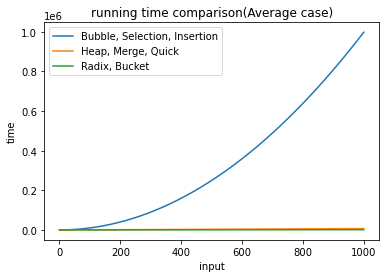

In [34]:
plt.plot(x, y, label='Bubble, Selection, Insertion')
plt.plot(x[1:], z, label='Heap, Merge, Quick')
plt.plot(x, x, label='Radix, Bucket')
plt.xlabel('input')
plt.ylabel('time')
plt.title('running time comparison(Average case)')
plt.legend()
plt.show()

### <a id='Time_Sort'>Time Sort</a>

Timsort (derived from merge sort and insertion sort) was introduced in 2002 and while slower than quicksort for random data, Timsort performs better on ordered data.

Timsort is a hybrid stable sorting algorithm, derived from merge sort and insertion sort, designed to perform well on many kinds of real-world data. The algorithm finds subsequences of the data that are already ordered (runs) and uses them to sort the remainder more efficiently. This is done by merging runs until certain criteria are fulfilled. Timsort has been <b>Python's standard sorting algorithm since version 2.3</b>.

Time sort advantages against Quick sort:<br>
(1) It is unbelievably fast for nearly sorted data sequence (including reverse sorted data).
<br>
(2)The worst case is still O(N*LOG(N)).

(1)Divide the array into blocks known as run<br>
(2)The size of a run can either be 32 or 64<br>
(3)Sort the elements of every run using insertion sort<br>
(4)Merge the sorted runs using the merge sort algorithm<br>
(5)Double the size of the merged array after every iteration<br>

Timsort is offically implemented in C, not Python. [ source code](https://github.com/python/cpython/blob/main/Objects/listobject.c)

python built in sort function:

In [45]:
arry = [1,4,5,4,1,2,159,-1,-2,2,5,6,99]
li = sorted(arry)
arry.sort()
print(li)
print(arry)

[-2, -1, 1, 1, 2, 2, 4, 4, 5, 5, 6, 99, 159]
[-2, -1, 1, 1, 2, 2, 4, 4, 5, 5, 6, 99, 159]


<b>Time Complexity :</b>
<br>
&emsp;Best case: &emsp; O(n)
<br>
&emsp;Worst case: &emsp; O(nlog(n)
<br>
&emsp;Avrage case:&emsp; O(nlog(n))

In [46]:
x = [i for i in range (1_000)]
y = [i**2 for i in x]
z = [i*math.log(i) for i in x[1:]]

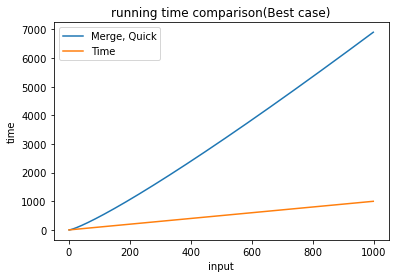

In [48]:
plt.plot(x[1:], z, label='Merge, Quick')
plt.plot(x, x, label='Time')
plt.xlabel('input')
plt.ylabel('time')
plt.title('running time comparison(Best case)')
plt.legend()
plt.show()

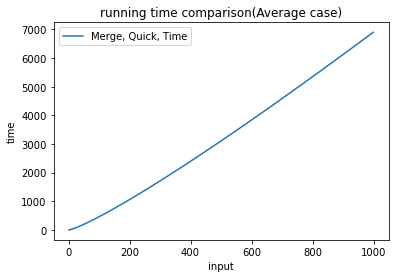

In [49]:
plt.plot(x[1:], z, label='Merge, Quick, Time')
plt.xlabel('input')
plt.ylabel('time')
plt.title('running time comparison(Average case)')
plt.legend()
plt.show()

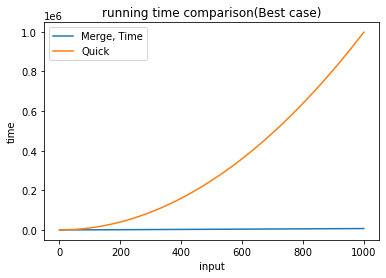

In [50]:
plt.plot(x[1:], z, label='Merge, Time')
plt.plot(x, y, label='Quick')
plt.xlabel('input')
plt.ylabel('time')
plt.title('running time comparison(Best case)')
plt.legend()
plt.show()

<b>Is there a sorting algorithm faster than quicksort and timesort ?<b>

### <a id='Quad_Sort'>Quad Sort</a>

Quadsort (derived from merge sort) was introduced in 2020 and is faster than quicksort for random data, and slightly faster than Timsort on ordered data.
<br>
Also of notice is the significant performance difference on small arrays, quadsort is on average two times faster than Timsort on data sets between 10 and 1000 elements. Quadsort achieves this performance through several optimizations spread out over 1500 lines of code that get the maximum performance out of merge sort.
<br>

This document describes a stable bottom-up adaptive merge sort named quadsort. A visualisation and benchmarks are available at the bottom  [quad sort](https://github.com/scandum/quadsort "https://github.com/scandum/quadsort").